<a href="https://colab.research.google.com/github/SHRAVAN-AMBEER/Machine-Learning-Lab/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of X_train: (537, 7)
Shape of y_train: (537,)
Accuracy: 0.6623376623376623


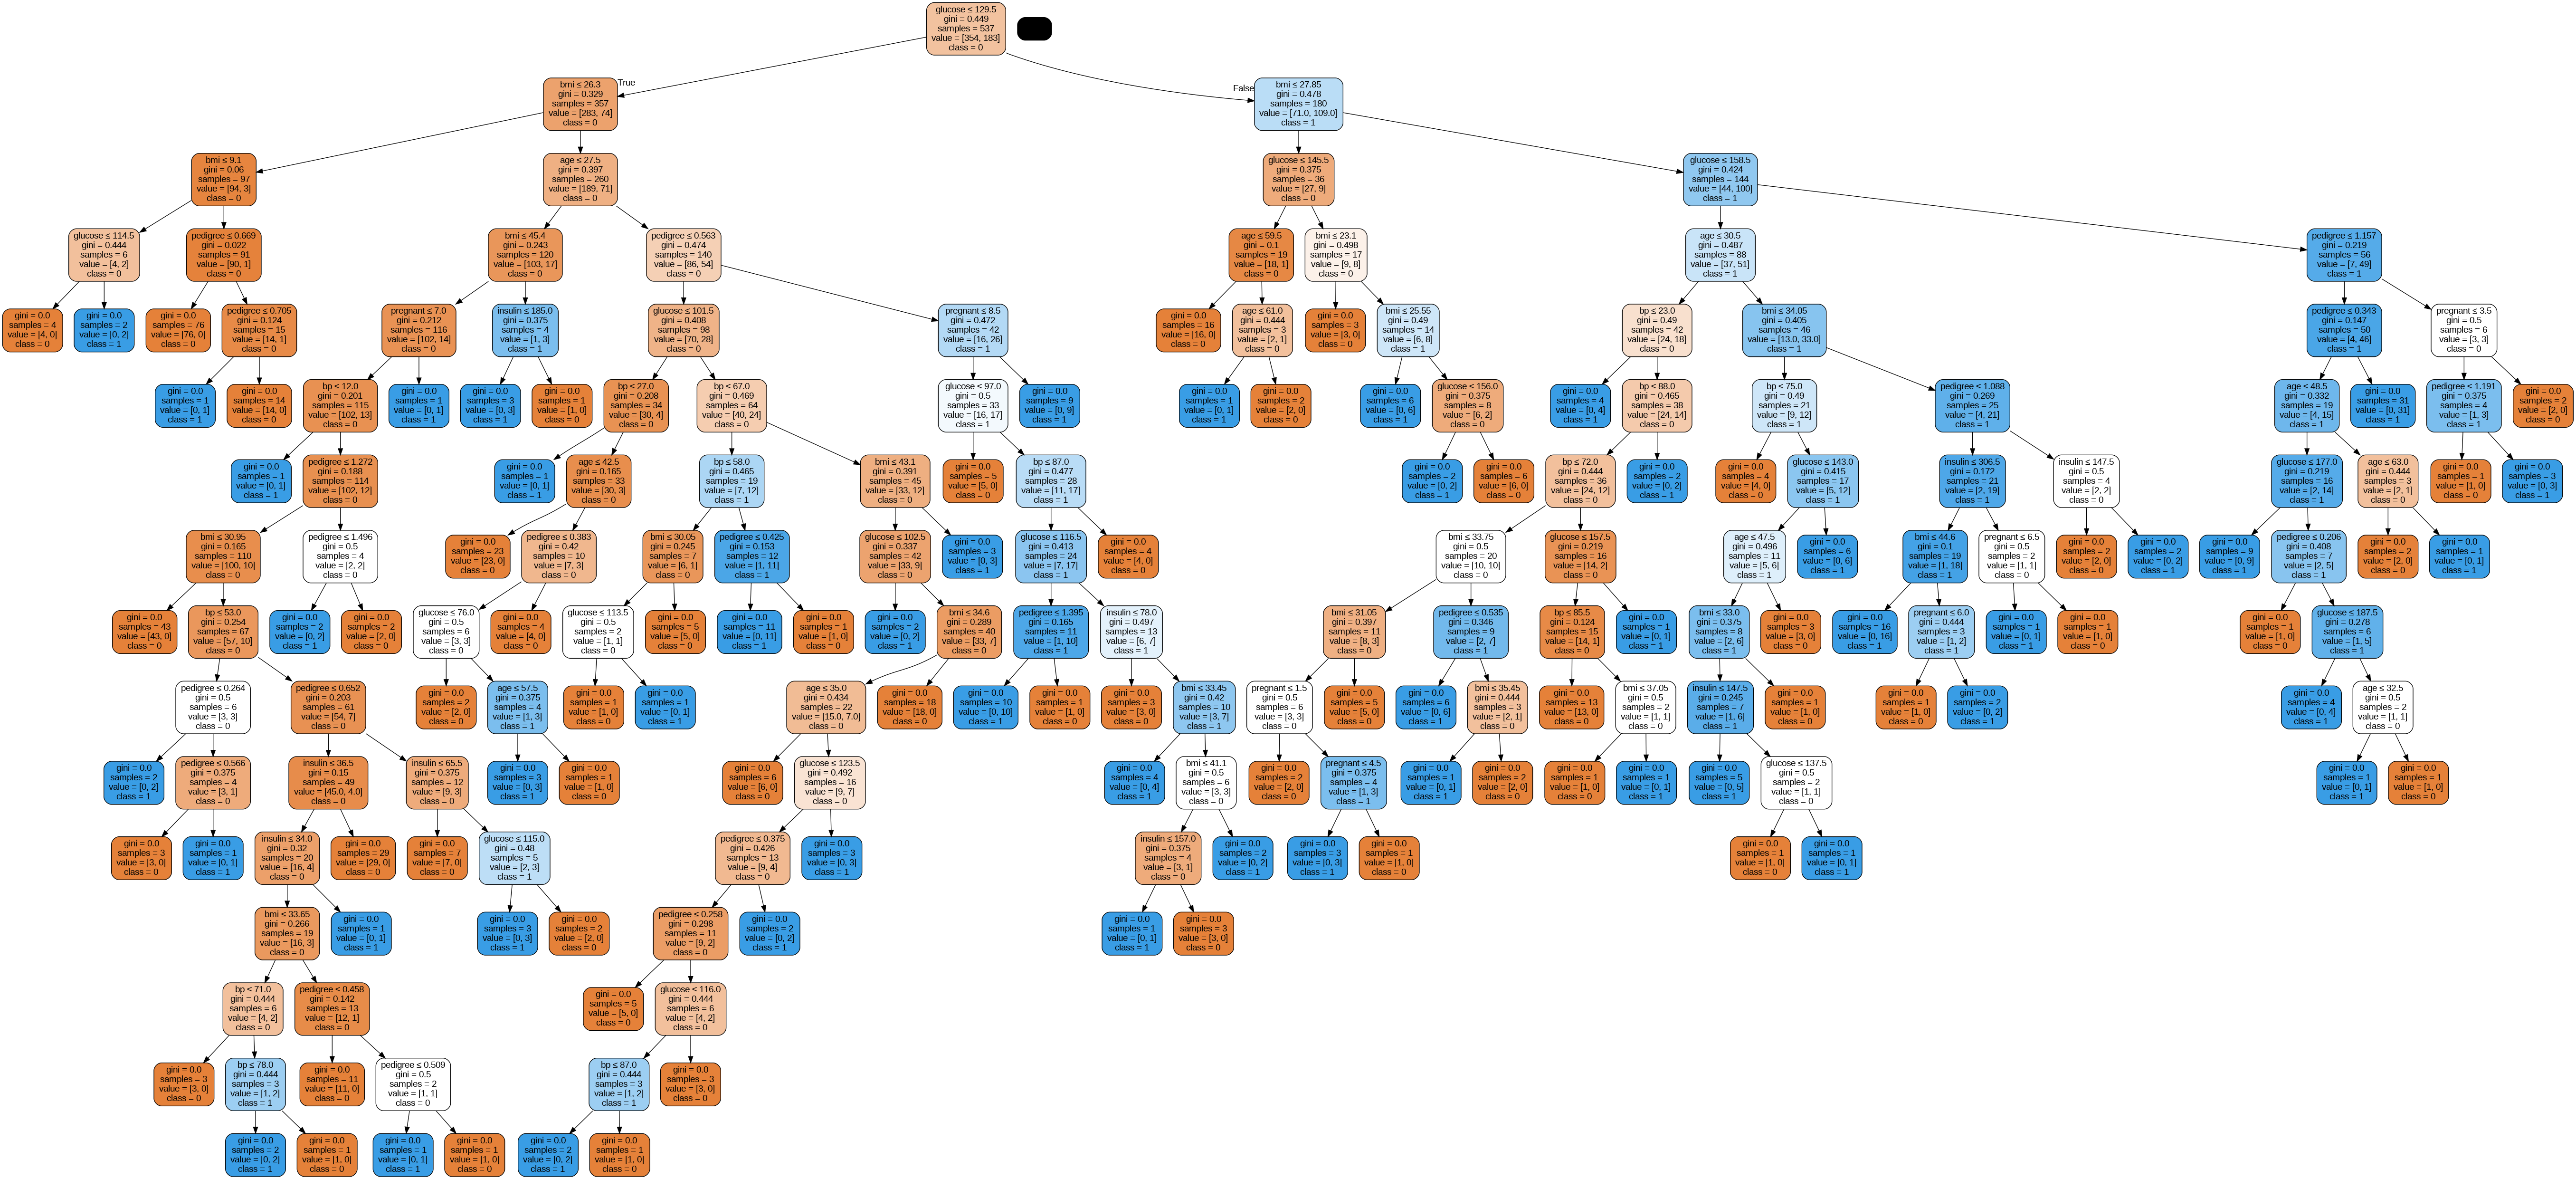

In [5]:
# Decision Tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
import six
from IPython.display import Image
import pydotplus
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi',
'pedigree', 'age', 'label']

# load dataset

pima = pd.read_csv("/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/diabetes_DT.csv",
names=col_names, skiprows=1)

pima.head()
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
# Features
X = pima[feature_cols]
# Target variable
y = pima.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


dot_data = six.StringIO()

export_graphviz(clf, out_file=dot_data,

filled=True, rounded=True,

special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('diabetes.png')

Image(graph.create_png())

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
print("feaures",iris.feature_names)
print("labels",iris.target_names)
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3,random_state=109)

feaures ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
labels ['setosa' 'versicolor' 'virginica']


First 5 rows of the Iris dataset:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

 Model Accuracy: 97.78 %

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97     

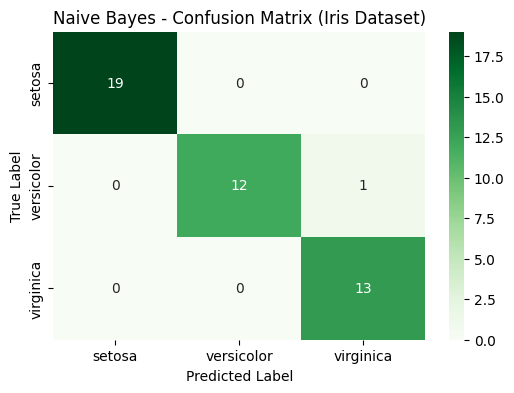

In [7]:
# NAIVE BAYES CLASSIFICATION ON IRIS DATASET

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = [target_names[i] for i in y]

print("First 5 rows of the Iris dataset:\n")
print(df.head())

# 2. Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n Model Accuracy:", round(accuracy * 100, 2), "%")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# 6. Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.title("Naive Bayes - Confusion Matrix (Iris Dataset)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [8]:
import numpy as np
from collections import Counter
def euclidean_distance(point1,point2):
  return np.sqrt(np.sum((np.array(point1)-np.array(point2)))**2)
def knn_predict(training_data, training_labels, test_point, k):
  distances = []
  for i in range(len(training_data)):
    dist = euclidean_distance(test_point, training_data[i])
    distances.append((dist, training_labels[i]))
  distances.sort(key=lambda x: x[0])
  k_nearest_labels = [label for _, label in distances[:k]]
  return Counter(k_nearest_labels).most_common(1)[0][0]

training_data = [[1,2],[2,3],[3,4],[6,7],[7,8]]
training_labels = ['A','A','A','B','B']
test_point = [4,5]
k=3
prediction = knn_predict(training_data, training_labels, test_point, k)
print("prediction: " ,prediction)

prediction:  A


First 5 rows of the Breast Cancer dataset:

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  w

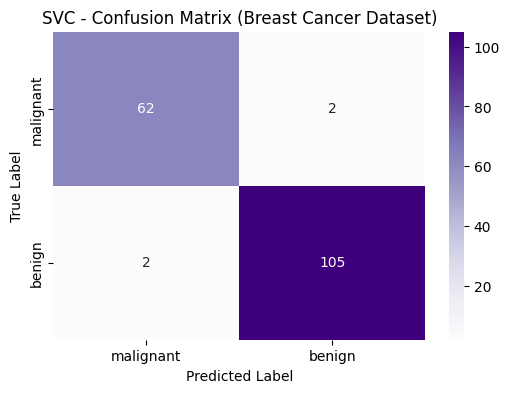

In [9]:

# SUPPORT VECTOR CLASSIFIER (SVC)
# on Breast Cancer Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load the dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Create DataFrame
df = pd.DataFrame(X, columns=cancer.feature_names)
df['target'] = y

print("First 5 rows of the Breast Cancer dataset:\n")
print(df.head())

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train SVC Model
svc = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc.fit(X_train_scaled, y_train)

# 5. Predictions and Evaluation
y_pred = svc.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n Model Accuracy:", round(accuracy * 100, 2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=cancer.target_names))

# 6. Visualization - Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title("SVC - Confusion Matrix (Breast Cancer Dataset)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']
Shape of Dataset: (150, 4)

Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



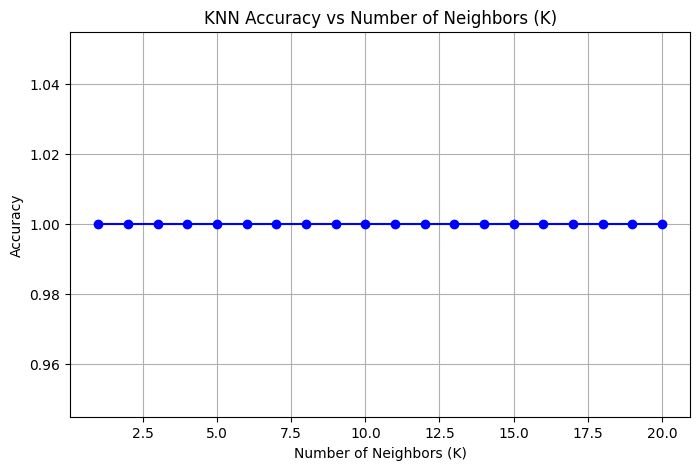

In [10]:

# K-NEAREST NEIGHBORS (KNN) ON IRIS DATASET

# Importing libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 1. Load and Explore the Dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

print("Feature Names:", iris.feature_names)
print("Target Names:", target_names)
print("Shape of Dataset:", X.shape)

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Model Training using KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 5. Model Prediction
y_pred = knn.predict(X_test)

# 6. Model Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# 7. Visualizing Accuracy for Different K Values
accuracy_list = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracy_list.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), accuracy_list, marker='o', color='blue')
plt.title("KNN Accuracy vs Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
